In [121]:
###Try Linear Model (no time considered)

#load library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import scipy.stats as stats
import datetime as dt

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import folium
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [3]:
#read Uber data
Uber2014 = pd.read_csv("../uber_2014_NTA.csv", sep = ",")

#get trip count per NTA
NTA_counts2014 = Uber2014["NTA"].value_counts().reset_index() ##193 NTA
NTA_counts2014.columns = ["nta_code", "trip_count"]

#read demographic data
demo = pd.read_csv("../final 9/demographics.csv", sep = ",")

In [25]:
## intersect two data frame by nta_code
subsetdemo = pd.merge(demo, NTA_counts2014, how = "inner", on = ["nta_code"])
print(subsetdemo.shape)
subsetdemo.head()

(188, 34)


,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,...,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income,trip_count
0,Allerton-Pelham Gardens,Bronx,BX31,28903,1679,1706,1763,2039,1964,1703,...,773,1160,1764,1155,1562,765,427,61638,78489,397
1,Annadale-Huguenot-Prince's Bay-Eltingville,Staten Island,SI01,27770,1397,1698,1817,1880,1720,1594,...,405,1008,1523,1346,2075,1086,1151,88288,109187,5
2,Arden Heights,Staten Island,SI48,25238,1507,1540,1596,1752,1614,1561,...,516,707,1421,1611,2021,1047,740,89570,101627,8
3,Astoria,Queens,QN70,78793,3480,3037,3060,3392,6630,11586,...,2816,4725,6463,4557,4698,1627,1197,54882,70094,16954
4,Auburndale,Queens,QN48,19996,917,966,1063,1168,1214,1307,...,632,690,1417,1060,1237,589,433,70772,84402,389


trip_count, normal test p.value = 9.551326927404212e-26
log_trip_count, normal test p.value = 0.00029107360751368105


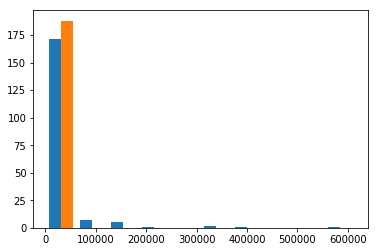

In [81]:
#change trip_count as log(trip_count)
subsetdemo["log_trip_count"] = np.log(subsetdemo["trip_count"])
print("trip_count, normal test p.value =",  stats.shapiro(subsetdemo["trip_count"])[1])
print("log_trip_count, normal test p.value =",  stats.shapiro(subsetdemo["log_trip_count"])[1])
plt.hist([subsetdemo["trip_count"], subsetdemo["log_trip_count"]])
plt.show()

##may need to consider those "extreme high" as outliers

In [82]:
subsetdemo.sort_values("trip_count", ascending = False).head(10)

,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,...,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income,trip_count,log_trip_count,young,middle,old
106,Midtown-Midtown South,Manhattan,MN17,28630,819,408,326,1328,3303,4552,...,2390,1778,4513,114491,184315,616172,13.331281,2881,13743,8865.0
83,Hudson Yards-Chelsea-Flat Iron-Union Square,Manhattan,MN13,70150,2601,1646,1339,1891,6111,9675,...,6217,3957,10711,101369,182129,423856,12.957149,7477,31298,22641.0
148,SoHo-TriBeCa-Civic Center-Little Italy,Manhattan,MN24,42742,2499,1667,1200,1236,3921,5354,...,2814,2020,6290,118931,235533,367005,12.813131,6602,18502,12666.0
177,West Village,Manhattan,MN23,66880,2219,1568,1054,3795,5313,9747,...,5915,4345,10204,112689,180247,363458,12.803419,8636,29028,21378.0
165,Turtle Bay-East Midtown,Manhattan,MN19,51231,1849,1076,761,993,3523,6966,...,5214,2669,8156,113998,196721,202878,12.220360,4679,19945,19985.0
167,Upper East Side-Carnegie Hill,Manhattan,MN40,61207,3174,3136,3003,2277,2339,3690,...,4076,2709,11946,155213,311109,172548,12.058431,11590,13203,28028.0
7,Battery Park City-Lower Manhattan,Manhattan,MN25,39699,2272,1055,691,1453,5203,7559,...,3878,2377,6650,125434,185275,159017,11.976766,5471,22946,8295.0
113,Murray Hill-Kips Bay,Manhattan,MN20,50742,1520,897,739,1069,7591,9722,...,4778,2526,5236,97458,137344,131285,11.785126,4225,26981,14322.0
33,Clinton,Manhattan,MN15,45884,1299,851,771,1103,4384,7093,...,4001,1859,3658,73591,106168,128582,11.764322,4024,21563,14499.0
54,East Village,Manhattan,MN22,44136,862,617,598,3259,7381,7720,...,3201,2155,2478,72665,100130,125652,11.741271,5336,23567,10867.0


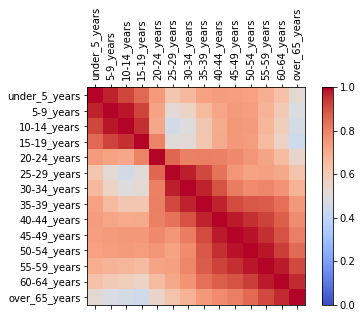

In [23]:
##check the correlation for age composition
age = subsetdemo.iloc[:, 4:18]
corr = age.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap = "coolwarm", vmin = 0, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,len(age.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(age.columns)
ax.set_yticklabels(age.columns)
plt.show()

In [94]:
subsetdemo.columns

Index(['nta_name', 'borough', 'nta_code', 'population', 'under_5_years',
       '5-9_years', '10-14_years', '15-19_years', '20-24_years', '25-29_years',
       '30-34_years', '35-39_years', '40-44_years', '45-49_years',
       '50-54_years', '55-59_years', '60-64_years', 'over_65_years',
       'median_age', 'people_per_acre', 'households', 'less_than_10,000',
       '10000_to_14999', '15000_to_24999', '25000_to_34999', '35000_to_49999',
       '50000_to_74999', '75000_to_99999', '100000_to_149999',
       '150000_to_199999', '200000_or_more', 'median_income', 'mean_income',
       'trip_count', 'log_trip_count', 'young', 'middle', 'old'],
      dtype='object')

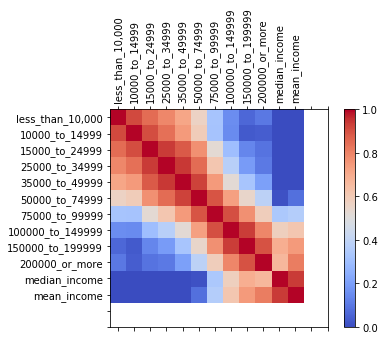

In [95]:
##check the correlation for income composition
income = subsetdemo.iloc[:, 21:33]
corr = income.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr, cmap = "coolwarm", vmin = 0, vmax = 1)
fig.colorbar(cax)
ticks = np.arange(0,len(age.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(income.columns)
ax.set_yticklabels(income.columns)
plt.show()

In [49]:
subsetdemo.head()

,nta_name,borough,nta_code,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,...,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income,trip_count,log_trip_count
0,Allerton-Pelham Gardens,Bronx,BX31,28903,1679,1706,1763,2039,1964,1703,...,1160,1764,1155,1562,765,427,61638,78489,397,5.983936
1,Annadale-Huguenot-Prince's Bay-Eltingville,Staten Island,SI01,27770,1397,1698,1817,1880,1720,1594,...,1008,1523,1346,2075,1086,1151,88288,109187,5,1.609438
2,Arden Heights,Staten Island,SI48,25238,1507,1540,1596,1752,1614,1561,...,707,1421,1611,2021,1047,740,89570,101627,8,2.079442
3,Astoria,Queens,QN70,78793,3480,3037,3060,3392,6630,11586,...,4725,6463,4557,4698,1627,1197,54882,70094,16954,9.738259
4,Auburndale,Queens,QN48,19996,917,966,1063,1168,1214,1307,...,690,1417,1060,1237,589,433,70772,84402,389,5.963579


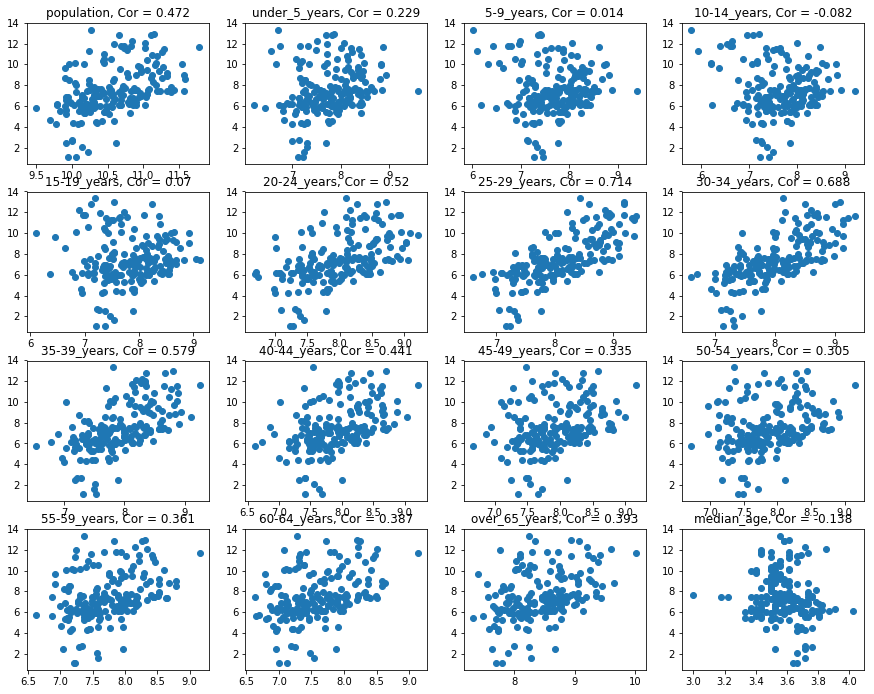

In [51]:
##check the age categories distribution versus trip counts
plt.figure(figsize = (15, 15))
for i in range(3,19):
    plt.subplot(5,4,i-2)
    x = subsetdemo.iloc[:,i]
    x = np.log(x)
    y = subsetdemo["log_trip_count"]
    correlation, _ = pearsonr(x, y)
    plt.scatter(x , y , data = subsetdemo)
    plt.title(label = subsetdemo.columns[i] + ", Cor = " + str(round(correlation, 3)))

#Note: the correlations between age and trip_count are different for age range

In [43]:
##univariate selection of each age 
age_test = SelectKBest(chi2, k = 10)
age_fit = age_test.fit(age, subsetdemo["trip_count"])
dfscores = pd.DataFrame(age_fit.scores_)
dfcolumns = pd.DataFrame(age.columns)
featureScores = pd.concat([dfcolumns, dfscores], axis = 1)
featureScores.columns = ["age", "score"]
print(featureScores.nlargest(10, "score"))

              age          score
13  over_65_years  318541.371821
5     25-29_years  291664.727456
6     30-34_years  236630.376467
4     20-24_years  193378.003990
0   under_5_years  193183.529872
7     35-39_years  172857.606526
1       5-9_years  163942.084494
3     15-19_years  159550.102166
2     10-14_years  156906.821571
8     40-44_years  144205.111869


In [54]:
###feature processing

#(1)  age 0-19 show similar pattern. those are "people without income", combine together
subsetdemo["young"] = subsetdemo.loc[:, ["under_5_years", "5-9_years", "10-14_years","15-19_years"]].sum(axis = 1)

#(2) age 20-39, all correlation >0.5, combine as one group
subsetdemo["middle"] = subsetdemo.loc[:,["20-24_years", "25-29_years", "30-34_years", "35-39_years"]].sum(axis = 1)

#(3) age 40-up, all correlation < 0.5, combine as one group
subsetdemo["old"] = subsetdemo.loc[:,["40-44_years", "45-49_years", "50-59_years", "60-64_years", "over_65_years"]].sum(axis = 1)


/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


In [58]:
type(subsetdemo)

pandas.core.frame.DataFrame

In [101]:
###just try all variables with recursive feature selection
X = subsetdemo.drop(["nta_name", "borough", "nta_code", "trip_count", "log_trip_count", "young", "middle", "old"], 1)
Y = subsetdemo["log_trip_count"]
X1 = sm.add_constant(X)

In [102]:
X1.head()

,const,population,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,35-39_years,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,1.0,28903,1679,1706,1763,2039,1964,1703,1798,1654,...,797,773,1160,1764,1155,1562,765,427,61638,78489
1,1.0,27770,1397,1698,1817,1880,1720,1594,1487,1814,...,571,405,1008,1523,1346,2075,1086,1151,88288,109187
2,1.0,25238,1507,1540,1596,1752,1614,1561,1726,1828,...,337,516,707,1421,1611,2021,1047,740,89570,101627
3,1.0,78793,3480,3037,3060,3392,6630,11586,9252,6843,...,3673,2816,4725,6463,4557,4698,1627,1197,54882,70094
4,1.0,19996,917,966,1063,1168,1214,1307,1296,1336,...,445,632,690,1417,1060,1237,589,433,70772,84402


In [105]:
model = sm.OLS(Y, X1).fit()
model.pvalues.sort_values()

mean_income         5.175914e-08
median_income       7.331882e-05
const               1.367522e-04
40-44_years         1.830428e-02
5-9_years           1.864791e-02
30-34_years         1.940490e-02
people_per_acre     3.143815e-02
200000_or_more      5.582320e-02
10-14_years         8.254956e-02
over_65_years       9.520613e-02
population          1.081116e-01
15000_to_24999      2.113213e-01
60-64_years         2.349085e-01
under_5_years       2.724348e-01
households          2.776511e-01
35000_to_49999      3.310755e-01
100000_to_149999    3.459574e-01
50000_to_74999      3.517561e-01
25-29_years         3.567316e-01
median_age          3.724966e-01
10000_to_14999      3.892899e-01
45-49_years         4.060013e-01
20-24_years         4.432238e-01
25000_to_34999      4.796301e-01
50-54_years         5.468764e-01
15-19_years         6.671433e-01
less_than_10,000    7.365145e-01
150000_to_199999    7.945720e-01
35-39_years         7.988033e-01
75000_to_99999      8.699393e-01
55-59_year

In [107]:
cols = list(X.columns)
pmax = 1
while (len(cols) > 0):
    p = []
    X1 = X[cols]
    X1 = sm.add_constant(X1)
    model = sm.OLS(Y, X1).fit()
    p = pd.Series(model.pvalues.values[1:], index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if (pmax > 0.5):
        cols.remove(feature_with_p_max)
    else:
        break

selected_features_BE = cols
len(selected_features_BE)

['under_5_years', '5-9_years', '10-14_years', '20-24_years', '25-29_years', '30-34_years', '40-44_years', '45-49_years', '60-64_years', 'over_65_years', 'median_age', 'people_per_acre', '10000_to_14999', '15000_to_24999', '25000_to_34999', '35000_to_49999', '100000_to_149999', '200000_or_more', 'median_income', 'mean_income']


In [109]:
len(selected_features_BE)
print(X.shape)

(188, 30)


In [112]:
#no of features
nof_list=np.arange(1,13)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 11
Score with 11 features: 0.620906


In [113]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 11)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,Y)  
#Fitting the data to model
model.fit(X_rfe,Y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['5-9_years', '10-14_years', '30-34_years', '35-39_years', '40-44_years',
       '50-54_years', '60-64_years', 'over_65_years', 'median_age',
       'people_per_acre', '25000_to_34999'],
      dtype='object')


In [115]:
reg = LassoCV(cv = 5)
reg.fit(X, Y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,Y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 39.071554
Best score using built-in LassoCV: 0.739772


In [116]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 10 variables and eliminated the other 20 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

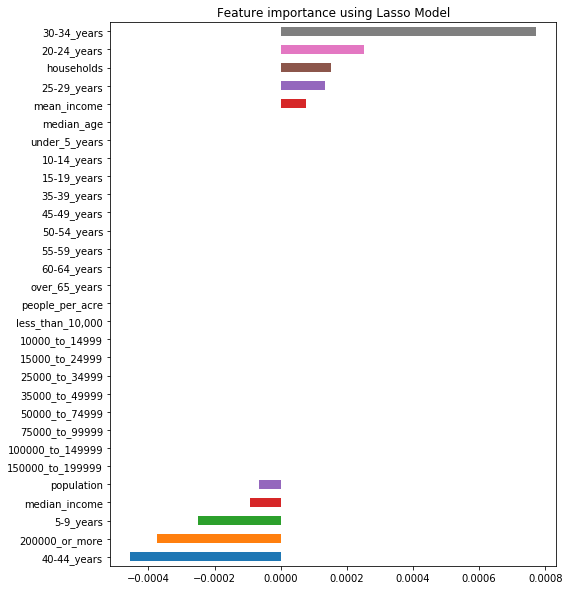

In [117]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

##https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b 

<function matplotlib.pyplot.show(*args, **kw)>

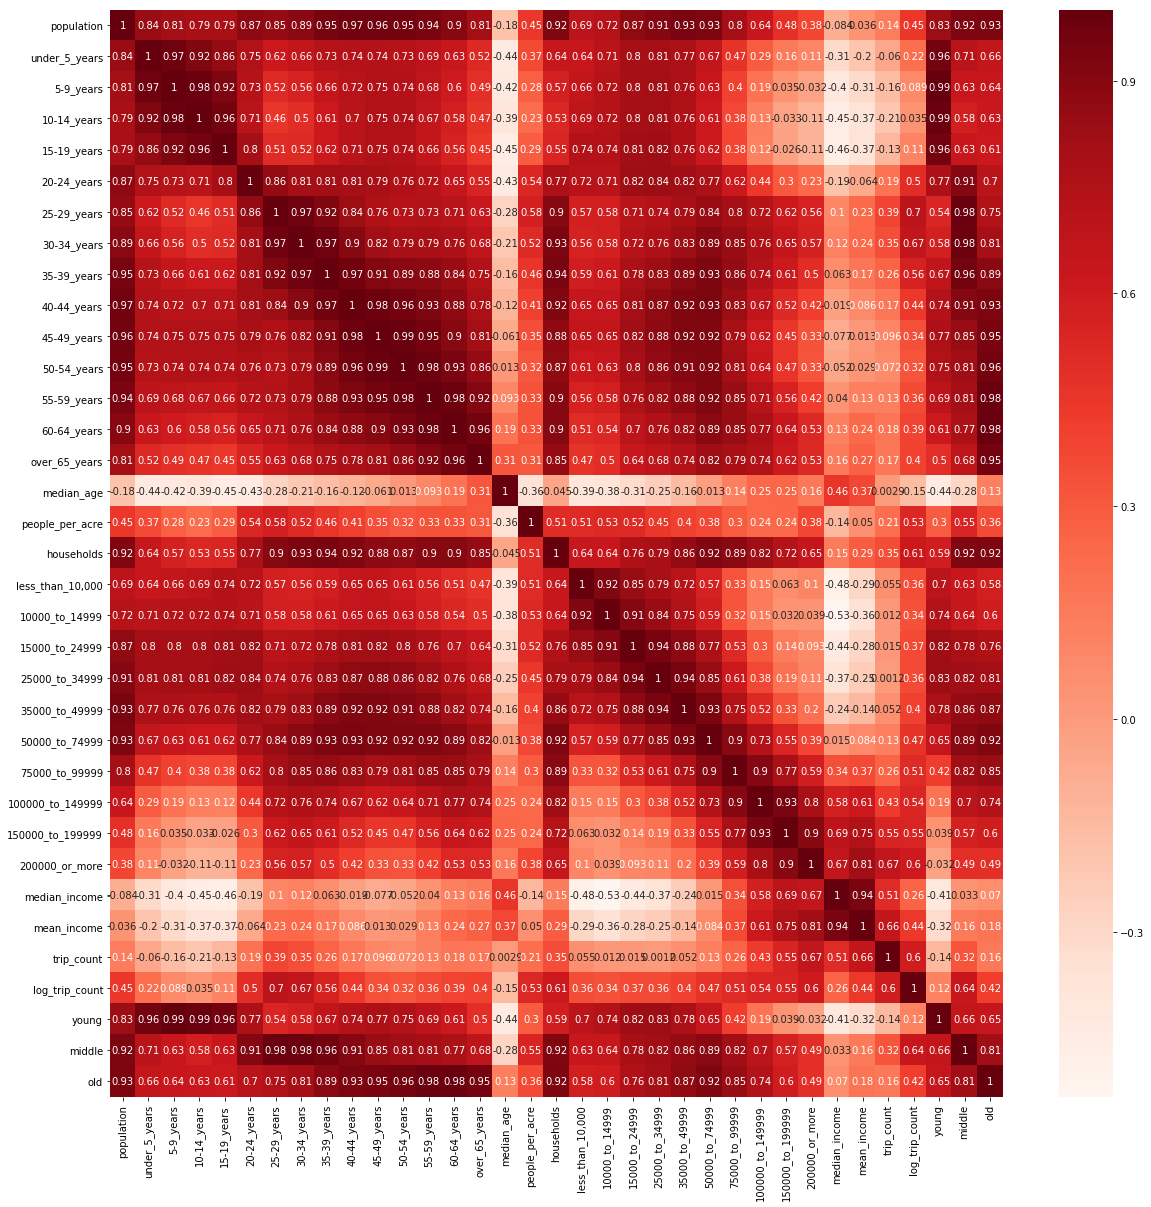

In [93]:
###pearson correlation
plt.figure(figsize = (20,20))
cor = subsetdemo.corr()
sns.heatmap(cor, annot = True, cmap = plt.cm.Reds)
plt.show

In [122]:
###using random forest for variable selection
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3, random_state = 0)
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [123]:
sel.get_support()

array([False, False, False, False, False, False,  True,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
        True,  True,  True])

In [124]:
selected_feat= X_train.columns[(sel.get_support())]
len(selected_feat)

6

In [125]:
print(selected_feat)

Index(['25-29_years', '30-34_years', 'people_per_acre', '200000_or_more',
       'median_income', 'mean_income'],
      dtype='object')


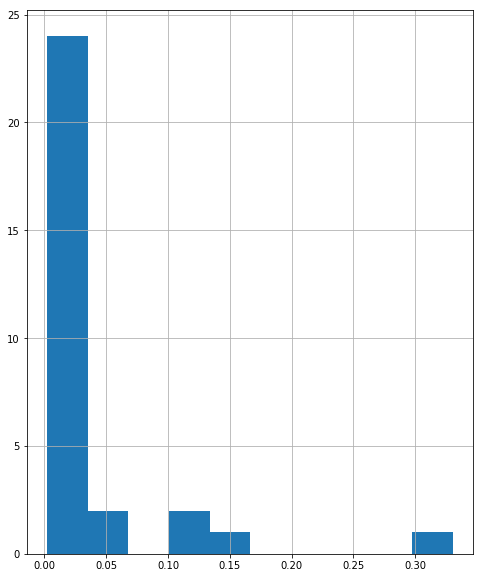

In [130]:
pd.Series(sel.estimator_.feature_importances_.ravel()).hist()